In [498]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [499]:
df = pd.read_csv('/home/bandr505/code/Projects/noice1/Iris.csv')
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [500]:
df = df.drop(columns=['Id'])

In [501]:
df.head(10)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [502]:
df.describe().round(2)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.00,150.00,150.00,150.00
mean,5.84,3.05,3.76,1.20
std,0.83,0.43,1.76,0.76
min,4.30,2.00,1.00,0.10
25%,5.10,2.80,1.60,0.30
50%,5.80,3.00,4.35,1.30
75%,6.40,3.30,5.10,1.80
max,7.90,4.40,6.90,2.50


In [503]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [504]:
df.dtypes

SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

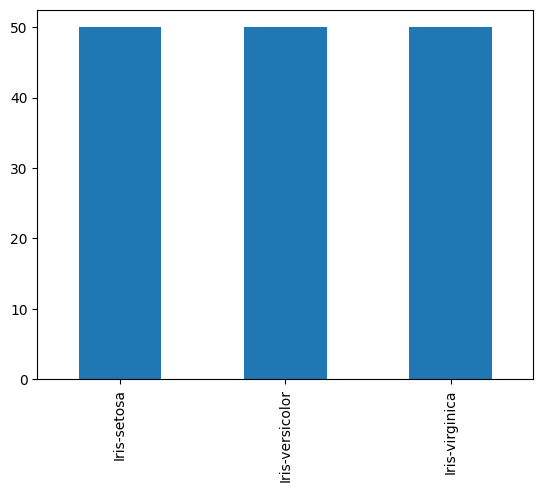

In [505]:
df['Species'].value_counts().plot(kind='bar');

In [506]:
df.shape

(150, 5)

In [507]:
df.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [508]:
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

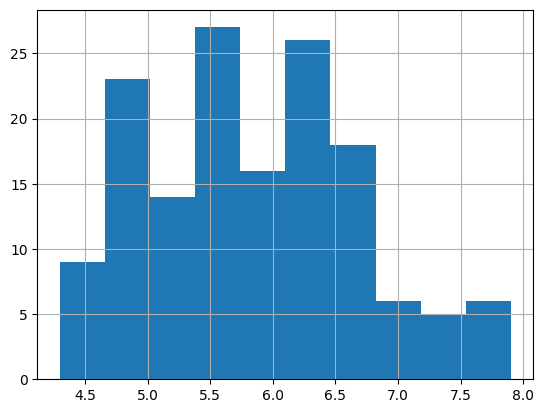

In [509]:
df['SepalLengthCm'].hist();

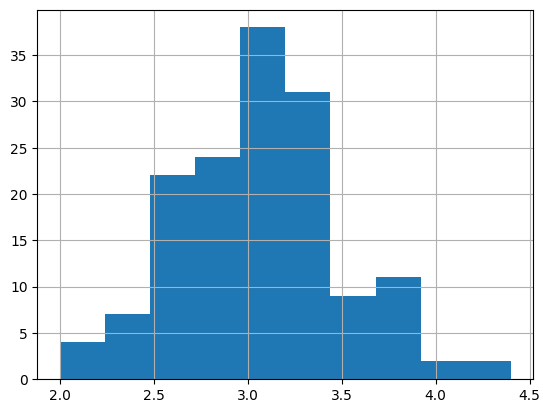

In [510]:
df['SepalWidthCm'].hist();

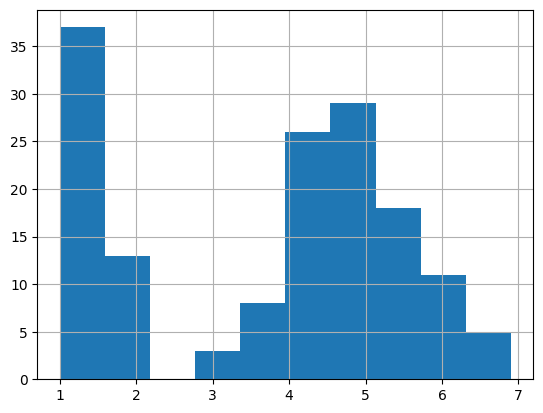

In [511]:
df['PetalLengthCm'].hist();

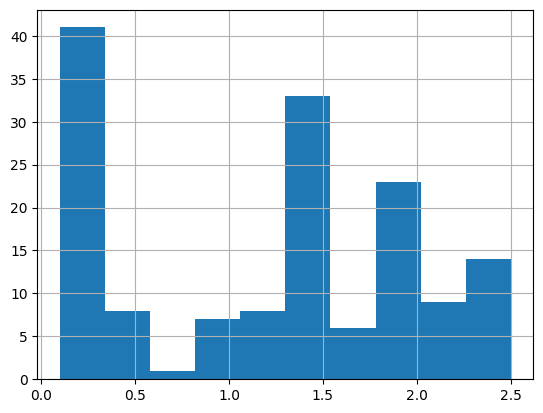

In [512]:
df['PetalWidthCm'].hist();

In [513]:
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [514]:
X = df.drop(columns=['Species'])
y = df['Species']

In [515]:
X

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [516]:
y

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: Species, Length: 150, dtype: object

In [517]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [518]:
trans = StandardScaler()
X_train = trans.fit_transform(X_train)
X_test = trans.transform(X_test)

In [519]:
X_train=trans.fit_transform(X_train)
X_test=trans.transform(X_test)

In [520]:
knn_model = KNeighborsClassifier(n_neighbors=9, p=2, metric='euclidean')
knn_model.fit(X_train, y_train)

y_pred = knn_model.predict(X_test)

In [521]:
accuracy_knn = accuracy_score(y_test, y_pred)
print("KNN Accuracy: ", accuracy_knn)

KNN Accuracy:  1.0


In [522]:
cm_knn = confusion_matrix(y_test, y_pred)
print("KNN Confusion Matrix:\n", cm_knn)

print("KNN Classification Report:\n", classification_report(y_test,y_pred))

KNN Confusion Matrix:
 [[15  0  0]
 [ 0 11  0]
 [ 0  0 12]]
KNN Classification Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        15
Iris-versicolor       1.00      1.00      1.00        11
 Iris-virginica       1.00      1.00      1.00        12

       accuracy                           1.00        38
      macro avg       1.00      1.00      1.00        38
   weighted avg       1.00      1.00      1.00        38



In [523]:
svm_model = SVC(kernel='linear', C=0.5, random_state=5)

svm_model.fit(X_train, y_train)

y_pred_svm = svm_model.predict(X_test)

In [524]:
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print("SVM Accuracy: ", accuracy_svm)

cm_svm = confusion_matrix(y_test, y_pred_svm)
print("SVM Confusion Matrix:\n", cm_svm)

print("SVM Classification Report:\n", classification_report(y_test, y_pred_svm))

SVM Accuracy:  0.9736842105263158
SVM Confusion Matrix:
 [[15  0  0]
 [ 0 10  1]
 [ 0  0 12]]
SVM Classification Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        15
Iris-versicolor       1.00      0.91      0.95        11
 Iris-virginica       0.92      1.00      0.96        12

       accuracy                           0.97        38
      macro avg       0.97      0.97      0.97        38
   weighted avg       0.98      0.97      0.97        38



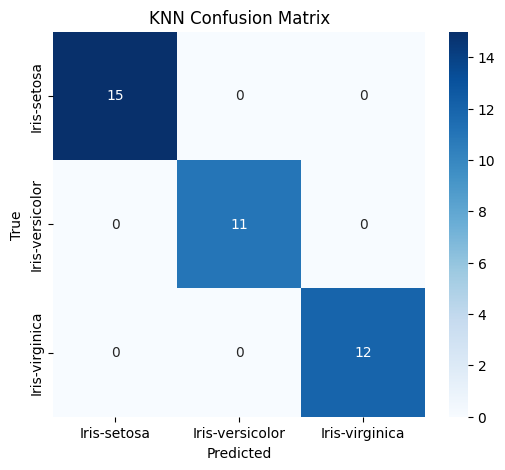

In [525]:
plt.figure(figsize=(6, 5))
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title('KNN Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

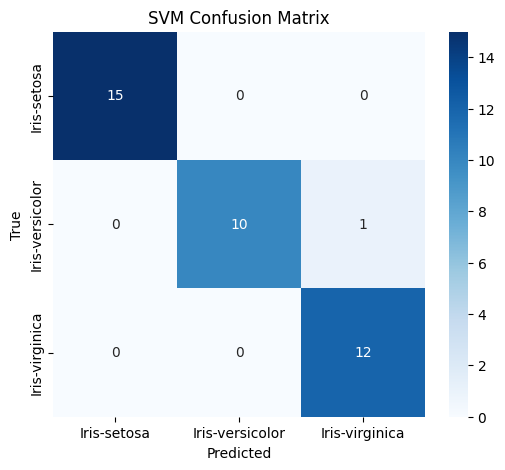

In [526]:
plt.figure(figsize=(6, 5))
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title('SVM Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


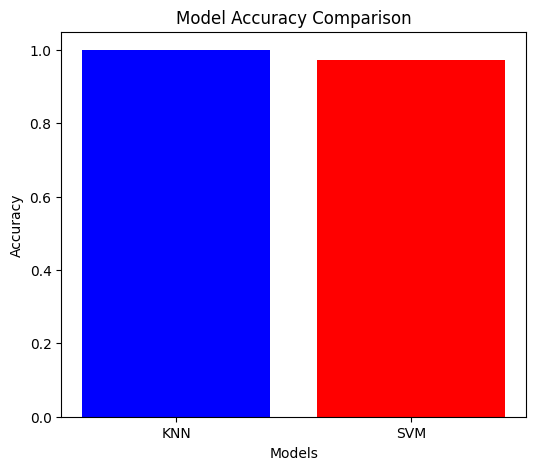

In [536]:
models = ['KNN', 'SVM']
accuracies = [accuracy_knn, accuracy_svm]

plt.figure(figsize=(6, 5))
plt.bar(models, accuracies, color=['blue', 'red'])
plt.title('Model Accuracy Comparison')
plt.xlabel('Models')
plt.ylabel('Accuracy')

plt.show()

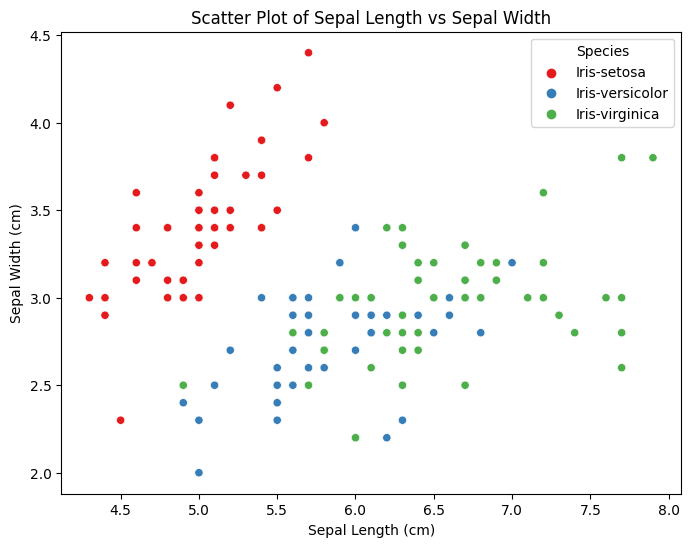

In [528]:
# اختيار ميزتين فقط للرسم (مثل SepalLength و SepalWidth)
plt.figure(figsize=(8, 6))
sns.scatterplot(x='SepalLengthCm', y='SepalWidthCm', hue='Species', data=df, palette='Set1')

plt.title('Scatter Plot of Sepal Length vs Sepal Width')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')

plt.show()

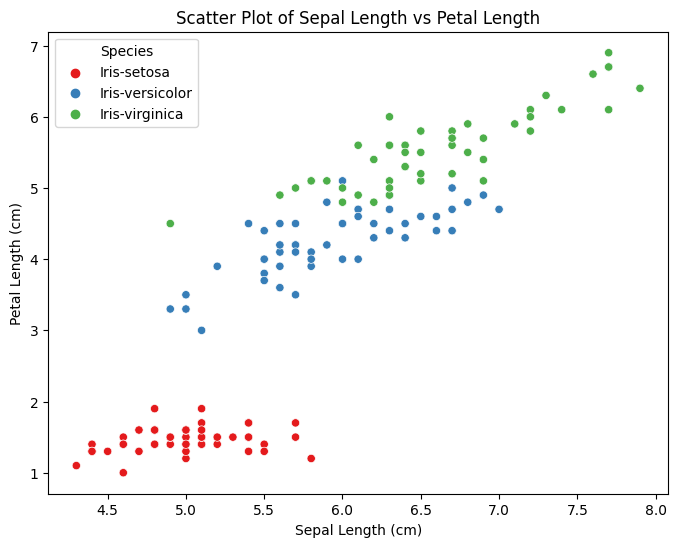

In [529]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='SepalLengthCm', y='PetalLengthCm', hue='Species', data=df, palette='Set1')
plt.title('Scatter Plot of Sepal Length vs Petal Length')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Petal Length (cm)')

plt.show()


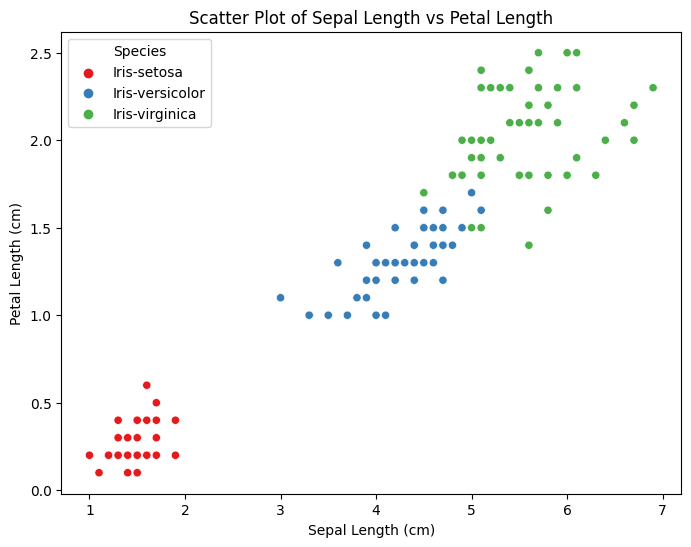

In [531]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='PetalLengthCm', y='PetalWidthCm', hue='Species', data=df, palette='Set1')
plt.title('Scatter Plot of Sepal Length vs Petal Length')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Petal Length (cm)')

plt.show()
